#1.0


##Environment

In [ ]:
!python --version

Python 3.10.12


##LIBRARIES



In [7]:
!pip install google_play_scraper

In [8]:
import time
import pandas as pd
from google_play_scraper import Sort, reviews
from time import sleep
import random
import timeit

In [9]:
import warnings
warnings.filterwarnings("ignore")

##DATA SCAPING

In [10]:
from typing_extensions import runtime_checkable
# Function to scrape reviews
def scrape_reviews(app_id):
    # Get the reviews
    result, continuation_token = reviews(
        app_id,
        lang='en', # Language of the reviews
        sort=Sort.NEWEST, # Sorting method: NEWEST, RATING, or HELPFULNESS
        count=200 # Number of reviews to retrieve
    )

    # Create a DataFrame to store the reviews
    reviews_df = pd.DataFrame(result)

    # Add a new column for 'app_name'
    reviews_df['app_name'] = app_name

    return reviews_df

# Define the app ID and the number of reviews to scrape
apps_info= {'Mini Games: Calm & Relax':'com.uc.minigame.relax',
            'Block Blast!': 'com.block.juggle',
            'Annoying Puzzle Game': 'com.gplay.annoying.puzzle.game',
            'Hole.io': 'io.voodoo.holeio',
            'Garena Lien Quan Mobile': 'com.garena.game.kgvn',
            'Coin Master - VTC Game': 'com.moonactive.coinmaster',
            'Free Fire': 'com.dts.freefireth',
            'Free Fire MAX': 'com.dts.freefiremax',
            'Geometry Dash': 'com.robtopx.geometryjump',
            'RFS - Real Flight Simulator': 'it.rortos.realflightsimulator',
            'Stardew Valley': 'com.chucklefish.stardewvalley',
            'LIMBO': 'com.playdead.limbo.full'}
             # App names: App ID on Google Play

# Initialize an empty DataFrame to store all reviews
all_reviews_df = pd.DataFrame()

#Mesure runtime
start_time = timeit.default_timer()

for app_name, app_id in apps_info.items():
  print(f"Scraping reviews for {app_name}...")

  # Scrape the reviews
  reviews_data = scrape_reviews(app_id)

  # Append to the main DataFrame
  all_reviews_df = pd.concat([all_reviews_df, reviews_data], ignore_index=True)

  time.sleep(2)

  # Save the data to a CSV file for each game in case some game can not be scraped
  reviews_data.to_csv(f'{app_name}_reviews.csv', index=False)
  print(f"Saved {len(reviews_data)} reviews for {app_name}\n")


end_time = timeit.default_timer()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")

# Optionally, save the combined data for all apps to a single CSV
all_reviews_df.to_csv('all_apps_reviews.csv', index=False)

Scraping reviews for Mini Games: Calm & Relax...
Saved 200 reviews for Mini Games: Calm & Relax

Scraping reviews for Block Blast!...
Saved 200 reviews for Block Blast!

Scraping reviews for Annoying Puzzle Game...
Saved 200 reviews for Annoying Puzzle Game

Scraping reviews for Hole.io...
Saved 200 reviews for Hole.io

Scraping reviews for Garena Lien Quan Mobile...
Saved 200 reviews for Garena Lien Quan Mobile

Scraping reviews for Coin Master - VTC Game...
Saved 200 reviews for Coin Master - VTC Game

Scraping reviews for Free Fire...
Saved 200 reviews for Free Fire

Scraping reviews for Free Fire MAX...
Saved 200 reviews for Free Fire MAX

Scraping reviews for Geometry Dash...
Saved 200 reviews for Geometry Dash

Scraping reviews for RFS - Real Flight Simulator...
Saved 200 reviews for RFS - Real Flight Simulator

Scraping reviews for Stardew Valley...
Saved 200 reviews for Stardew Valley

Scraping reviews for LIMBO...
Saved 200 reviews for LIMBO

Runtime: 27.242734785999346 second

#EDA

In [ ]:
all_reviews_df.isna().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,464
at,0
replyContent,1556
repliedAt,1556


In [ ]:
data = all_reviews_df[['content', 'score']]

In [ ]:
def determine_sentiment(score):
  if score == 1 or score == 2:
    return 'negative'
  elif score == 3:
    return 'neutral'
  else:
    return 'positive'

data['sentation'] = data['score'].apply(determine_sentiment)

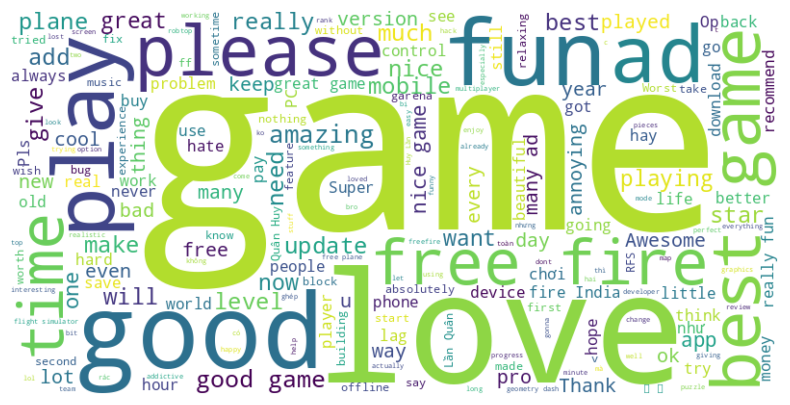

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine all text in the 'content' column
text = ' '.join(data['content'].astype(str))

# Create and configure the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

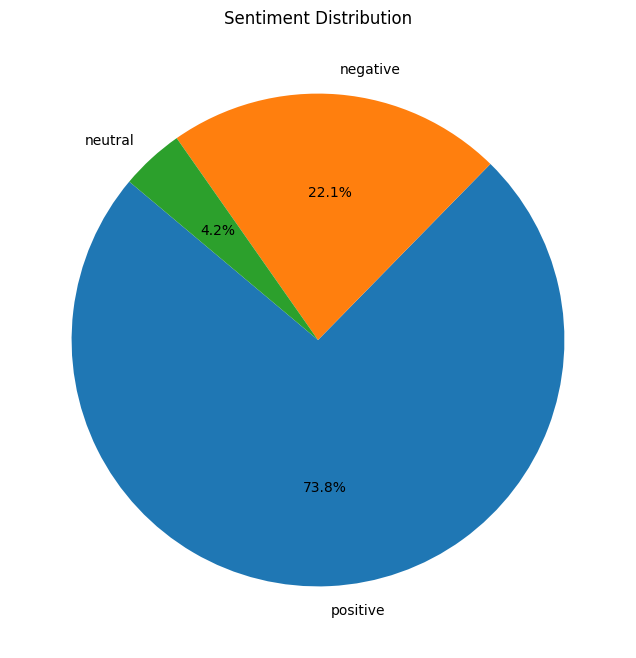

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = data['sentation'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

#Draft

In [ ]:
# Function to scrape reviews
def scrape_reviews(app_id, num_reviews):
    # Get the reviews
    result, continuation_token = reviews(
        app_id,
        lang='en', # Language of the reviews
        #country='us', # Country of the reviews
        sort=Sort.NEWEST, # Sorting method: NEWEST, RATING, or HELPFULNESS
        count=num_reviews # Number of reviews to retrieve
    )

    # Create a DataFrame to store the reviews
    reviews_df = pd.DataFrame(result)

    # Select relevant columns
    #reviews_df = reviews_df[['User_ID', 'Rating', 'at', 'content']]

    return reviews_df

# Define the app ID and the number of reviews to scrape
app_id = 'com.netease.idv.googleplay'  # Identity V app ID on Google Play
num_reviews = 100  # Number of reviews to scrape

# Scrape the reviews
reviews_data = scrape_reviews(app_id, num_reviews)

# Display the first few rows of the scraped data
print(reviews_data.head())

# Save the data to a CSV file if needed
reviews_data.to_csv('identity_v_reviews.csv', index=False)


                               reviewId             userName  \
0  d4b0e1cc-8d19-43f4-8cb4-fb44540acbd6  Johann Alexis Dizon   
1  1565e667-d9a1-4dfa-b39a-ae19cfe43dfb            Arcu Elke   
2  36a43489-98e9-4b87-8cac-d23f632d7dda               Grekce   
3  6587e32e-6de1-4a5e-bd90-dd5614371a53       Hichem Samaali   
4  8cbf3df3-5bc2-4d52-abde-e2b8b6d35be6          Sam P (Raz)   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  Can you please make the crossover skins free t...      3              0   
1  5 star because the minor is more detailed and ...      5              0   
2  Please fix the ping issue sometimes my pi

In [ ]:
data = reviews_data[['content', 'score']]
data

,content,score
0,Can you please make the crossover skins free t...,3
1,5 star because the minor is more detailed and ...,5
2,Please fix the ping issue sometimes my ping sp...,4
3,I don't know why i started getting a lot of ra...,1
4,I'm primarily a PC player but I love this game...,5
...,...,...
95,Froze up loading wouldn't load saad,1
96,Wonderful. I don't want to say anything else b...,5
97,It's going to play sometime. I could hit somet...,5
98,too much laggy,2


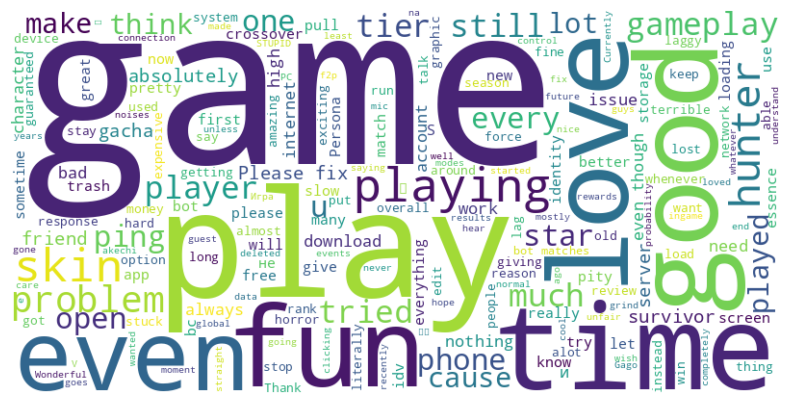

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine all text in the 'content' column
text = ' '.join(data['content'].astype(str))

# Create and configure the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
def determine_sentiment(score):
  if score == 1 or score == 2:
    return 'negative'
  elif score == 3:
    return 'neutral'
  else:
    return 'positive'

data['sentation'] = data['score'].apply(determine_sentiment)

In [ ]:
data['sentation'] = data['score'].apply(lambda score: 'negative' if score in [1, 2] else 'neutral' if score == 3 else 'positive')


<ipython-input-14-5a7d8489e8ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentation'] = data['score'].apply(lambda score: 'negative' if score in [1, 2] else 'neutral' if score == 3 else 'positive')


In [ ]:
data.head()


,content,score,sentation
0,Can you please make the crossover skins free t...,3,neutral
1,5 star because the minor is more detailed and ...,5,positive
2,Please fix the ping issue sometimes my ping sp...,4,positive
3,I don't know why i started getting a lot of ra...,1,negative
4,I'm primarily a PC player but I love this game...,5,positive


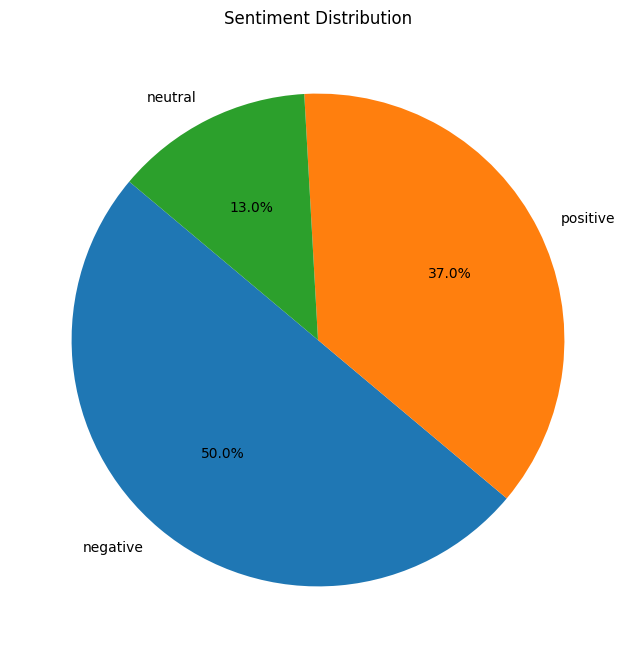

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = data['sentation'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()


#2.0

##silly corpilot

In [ ]:
# Initialize the WebDriver
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
#set options to be headless, ..
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [ ]:
#open it, go to a website, and get results
driver = webdriver.Chrome(options=options)

In [ ]:
# # Import necessary libraries
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# import time
# import csv

# Initialize the WebDriver
# driver = webdriver.Chrome(service=webdriver.chrome.service.Service(ChromeDriverManager().install()))

# Function to extract reviews
def extract_reviews(app_url):
    driver.get(app_url)
    time.sleep(5)  # Wait for the page to load

    reviews = []
    review_containers = driver.find_elements(By.CLASS_NAME, 'review-container')
    for container in review_containers:
        review = container.find_element(By.CLASS_NAME, 'review-text').text
        rating = container.find_element(By.CLASS_NAME, 'star-rating').get_attribute('aria-label')
        reviews.append([review, rating])

    return reviews

# URLs of the apps to scrape
app_urls = [
    'https://play.google.com/store/apps/details?id=com.kiloo.subwaysurf',
    'https://play.google.com/store/apps/details?id=com.king.candycrushsaga'
    # Add more URLs as needed
]

# Extract and save reviews
all_reviews = []
for url in app_urls:
    all_reviews.extend(extract_reviews(url))

# Save to CSV
with open('app_reviews.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review', 'Rating'])
    writer.writerows(all_reviews)

# Close the WebDriver
driver.quit()


In [ ]:
# prompt: open app_reviews.cvs and create a dataframe from it

import pandas as pd

# Assuming 'app_reviews.csv' is in the current directory
df = pd.read_csv('app_reviews.csv')

# Display the DataFrame
print(df)


Empty DataFrame
Columns: [Review, Rating]
Index: []


##dummy gpt ver 1

In [ ]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import csv

# Initialize the web driver (Make sure to have the correct path for your driver)
driver = webdriver.Chrome(executable_path='path_to_chromedriver')

# Open the Google Play page of the app
driver.get('https://play.google.com/store/apps/details?id=com.example.app')

# Locate the 'See all reviews' button and click it
see_all_reviews = driver.find_element(By.XPATH, "//button[contains(text(), 'See all reviews')]")
see_all_reviews.click()

# Allow the page to load
time.sleep(3)

# Scroll through the reviews to load more
for i in range(5):  # Adjust the range as necessary to load more reviews
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # Adjust the sleep time as necessary

# Extract the review elements
reviews = driver.find_elements(By.XPATH, "//div[@class='review-text']")  # Adjust the XPATH to match the exact review element

# Open CSV file to store the reviews
with open('reviews.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Rating', 'Review'])

    # Loop through the reviews and extract the text and rating
    for review in reviews:
        rating = review.find_element(By.XPATH, ".//div[@class='star-rating']").get_attribute('aria-label')
        text = review.find_element(By.XPATH, ".//span[@class='review-body']").text
        writer.writerow([rating, text])

# Close the browser
driver.quit()


TypeError: WebDriver.__init__() got an unexpected keyword argument 'executable_path'

##dummy gpt ver 2

In [ ]:
# Step 1: Setup Environment
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import csv

# Initialize WebDriver
driver = webdriver.Chrome()

# Step 2: Navigate to App's Reviews Page
driver.get("https://play.google.com/store/apps/details?id=com.example.app")

# Click on 'See all reviews'
see_all_reviews_button = driver.find_element(By.XPATH, "//button[@aria-label='See all reviews']")
see_all_reviews_button.click()

# Step 3: Retrieve Reviews
time.sleep(2)  # Wait for the reviews container to load
reviews = driver.find_elements(By.XPATH, "//div[@jsname='fk8dgd']")

# Extract reviews and ratings
review_data = []
for review in reviews:
    rating = review.find_element(By.XPATH, ".//div[@role='img']").get_attribute("aria-label")
    text = review.find_element(By.XPATH, ".//span[@jsname='bN97Pc']").text
    review_data.append([rating, text])

# Step 4: Save data to CSV
with open("google_play_reviews.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Rating", "Review"])
    writer.writerows(review_data)

# Step 5: Close the Browser
driver.quit()


##Code snippet


In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install webdriver-manager

In [ ]:
from selenium.common.exceptions import WebDriverException
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
import selenium.webdriver.common.action_chains as ActionChains
import csv, time